# Tutorial Completo de Seaborn
## Visualização de Dados Estatísticos com Python

---

## Índice
1. Setup e Imports
2. Carregando os Dados (Titanic Dataset)
3. Introdução ao Seaborn
4. Gráficos de Distribuição
5. Gráficos Categóricos
6. Gráficos de Relação
7. Gráficos Matriciais
8. Customização e Estilos
9. Subplots com Seaborn
10. Paletas de Cores
11. Perguntas Comuns

---

## 🔗 Links Importantes:
- 📖 [Documentação Oficial Seaborn](https://seaborn.pydata.org/)
- 🎨 [Galeria de Exemplos](https://seaborn.pydata.org/examples/index.html)
- 🎨 [Tutorial Oficial](https://seaborn.pydata.org/tutorial.html)
- 📊 [Choosing Plot Types](https://seaborn.pydata.org/tutorial/function_overview.html)
- 🎨 [Color Palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)


---
## #1 - Setup e Imports

**Instalar seaborn se necessário:**

In [1]:
# Descomente a linha abaixo se precisar instalar
# !pip install seaborn matplotlib pandas numpy

**Importar bibliotecas:**

In [3]:
# Imports necessários
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Configurações
%matplotlib inline

# Configuração de estilo padrão
sns.set_theme()


---
## #2 - Carregando os Dados

Vamos usar o dataset **Titanic** - um dos mais famosos para análise exploratória!

### Sobre o Dataset:
- **Passageiros**: 891 pessoas
- **Colunas**: idade, sexo, classe, tarifa, sobrevivência, etc.
- **Objetivo**: Entender padrões de sobrevivência no Titanic

In [4]:
# Carregar o dataset Titanic
df = sns.load_dataset('titanic')
print(f"Shape dos dados: {df.shape}")
print(f"Total de linhas: {len(df)}")
df.head()

Shape dos dados: (891, 15)
Total de linhas: 891


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# Estatísticas descritivas
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Verificar valores nulos
print("Valores nulos por coluna:")
print(df.isnull().sum())

Valores nulos por coluna:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [8]:
# Colunas disponíveis
print("Colunas do dataset:")
print(df.columns.tolist())

Colunas do dataset:
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


---
## #3 - Introdução ao Seaborn

**Seaborn** é uma biblioteca de visualização baseada em Matplotlib, focada em gráficos estatísticos!

###  Vantagens:
- Gráficos estatísticos bonitos por padrão
- Integração perfeita com pandas
- Paletas de cores profissionais
- Sintaxe simples e intuitiva
- Excelente para análise exploratória

### Sintaxe básica:
```python
sns.tipo_de_grafico(data=df, x='coluna_x', y='coluna_y')
plt.show()
```

### Seaborn vs Matplotlib:
- Seaborn: Alto nível, estatístico, estilos bonitos
- Matplotlib: Baixo nível, controle total, base de tudo

---
## #4 - Gráficos de Distribuição

### 📊 Histplot (Histograma)

**Exemplo 1: Distribuição de Idade**

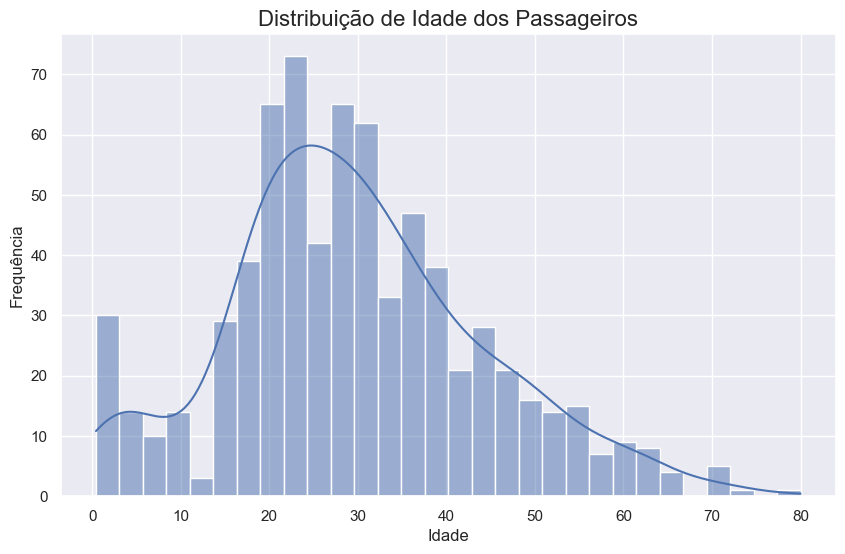

In [11]:
# Histograma simples
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Distribuição de Idade dos Passageiros', fontsize=16)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

**Exemplo 2: Histograma com Hue (colorido por categoria)**

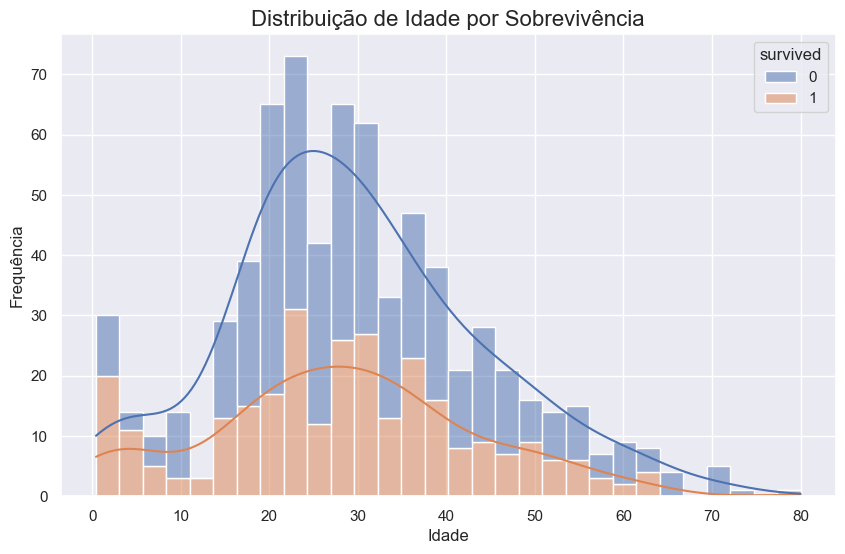

In [12]:
# Histograma colorido por sobrevivência
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='survived',
             bins=30, kde=True, multiple='stack')
plt.title('Distribuição de Idade por Sobrevivência', fontsize=16)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

---
### 📊 KDE Plot (Kernel Density Estimate)

**Visualização suave da distribuição**

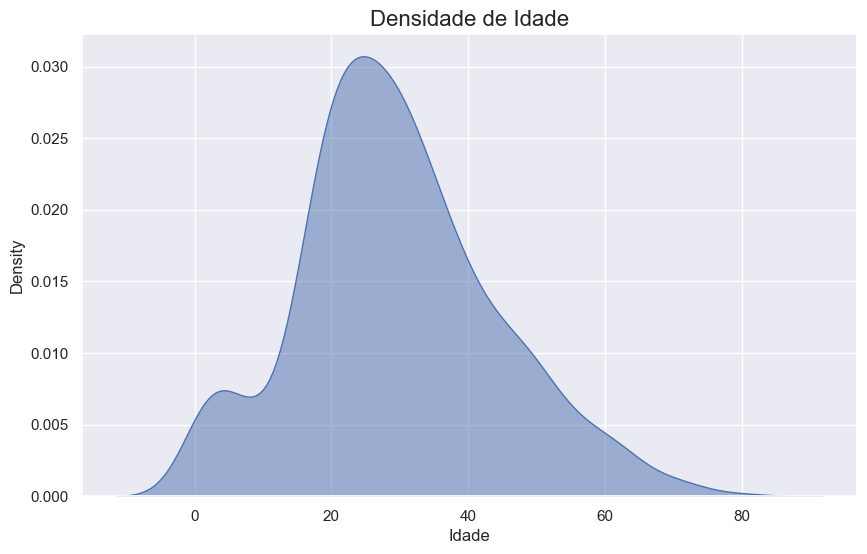

In [13]:
# KDE plot simples
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', fill=True, alpha=0.5)
plt.title('Densidade de Idade', fontsize=16)
plt.xlabel('Idade')
plt.show()

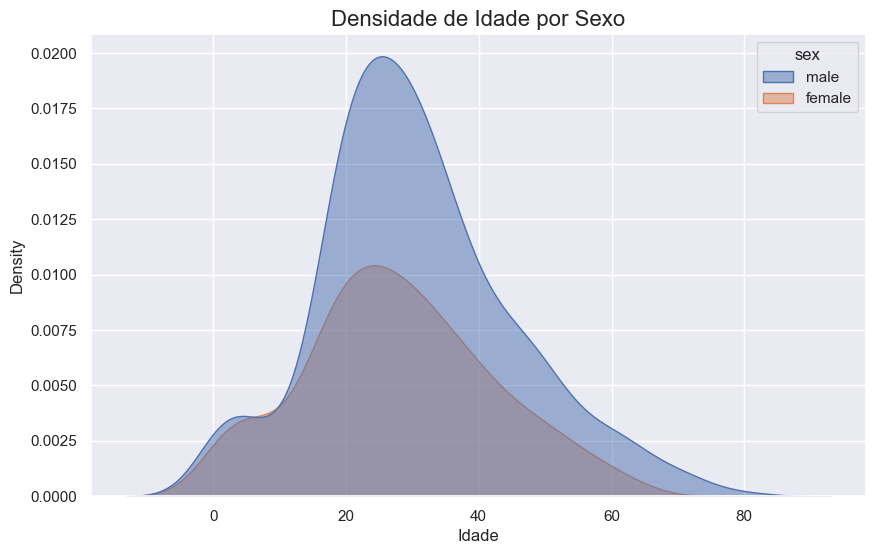

In [14]:
# KDE plot com múltiplas categorias
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='sex', fill=True, alpha=0.5)
plt.title('Densidade de Idade por Sexo', fontsize=16)
plt.xlabel('Idade')
plt.show()

---
### 📊 Distribution Plot (Displot)

**Combina histograma + KDE automaticamente**

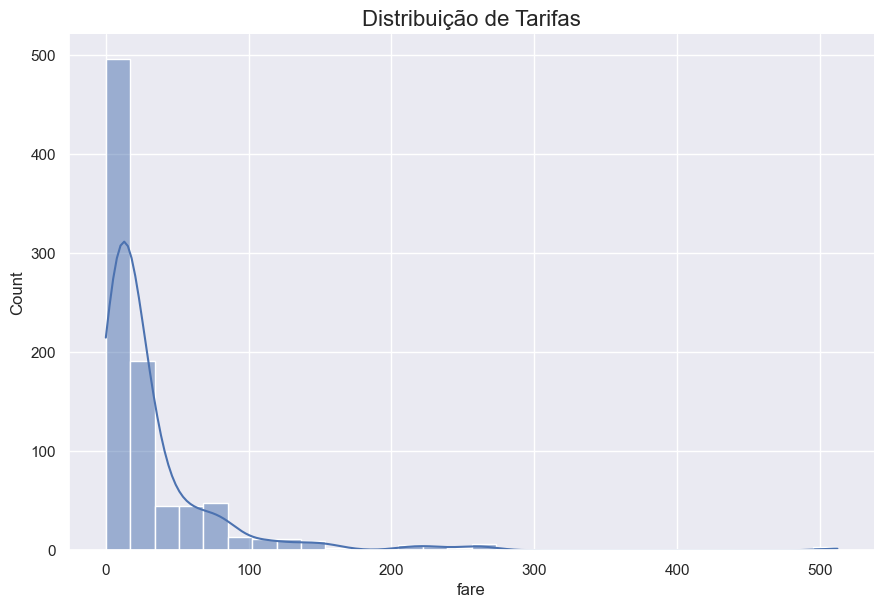

In [15]:
# Displot com KDE
sns.displot(data=df, x='fare', kde=True, bins=30, height=6, aspect=1.5)
plt.title('Distribuição de Tarifas', fontsize=16)
plt.show()

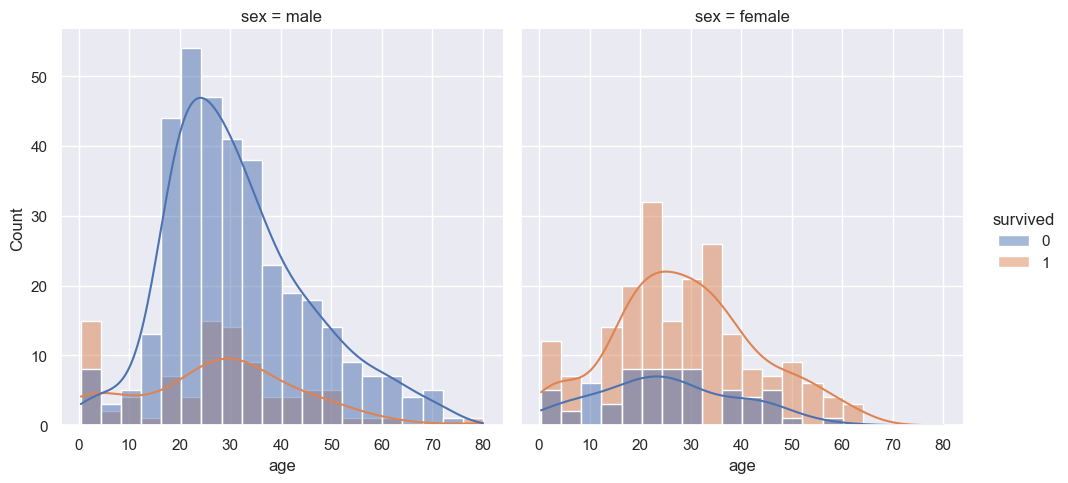

In [16]:
# Displot com facet (múltiplos gráficos)
sns.displot(data=df, x='age', hue='survived', col='sex', kde=True, height=5)
plt.show()

---
### 📊 Rug Plot

**Mostra cada observação como uma linha vertical**

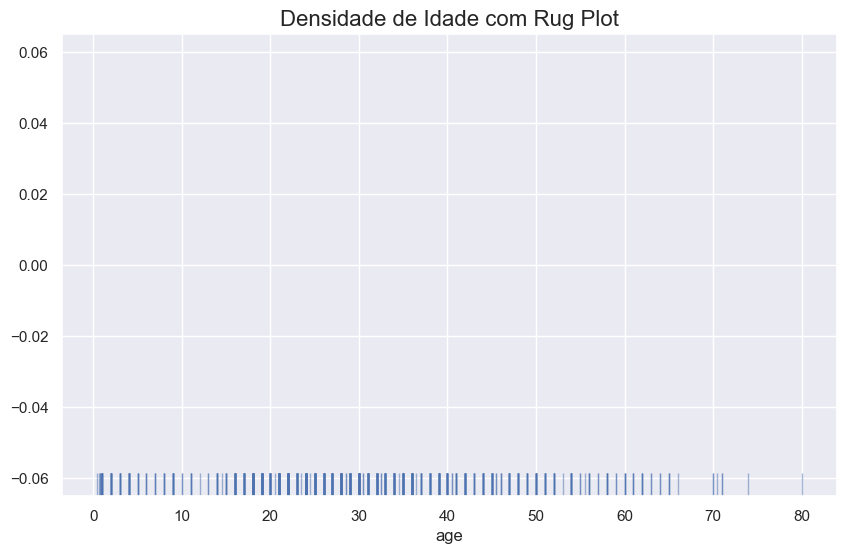

In [18]:
# Combinando Rug
plt.figure(figsize=(10, 6))
sns.rugplot(data=df, x='age', height=0.05, alpha=0.5)
plt.title('Densidade de Idade com Rug Plot', fontsize=16)
plt.show()

---
## #5 - Gráficos Categóricos

### 📊 Count Plot (Contagem)

**Exemplo 1: Contagem simples**

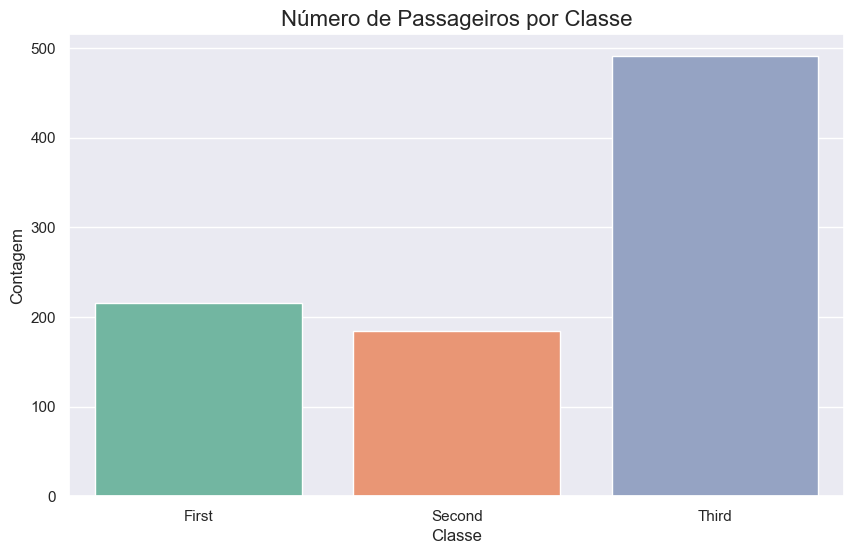

In [19]:
# Contagem de passageiros por classe
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class', palette='Set2')
plt.title('Número de Passageiros por Classe', fontsize=16)
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

**Exemplo 2: Contagem com Hue**

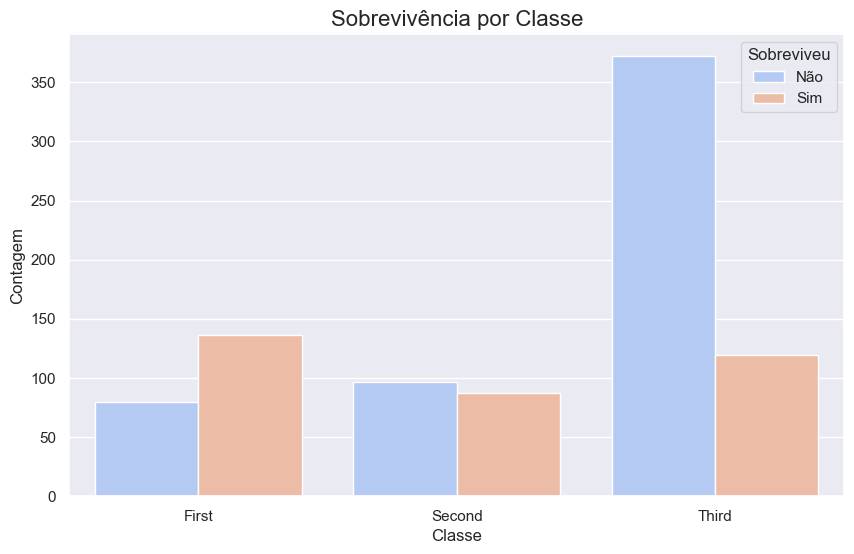

In [20]:
# Contagem por classe e sobrevivência
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class', hue='survived', palette='coolwarm')
plt.title('Sobrevivência por Classe', fontsize=16)
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

---
### 📊 Bar Plot (Média com Intervalo de Confiança)

**Mostra médias com barras de erro**

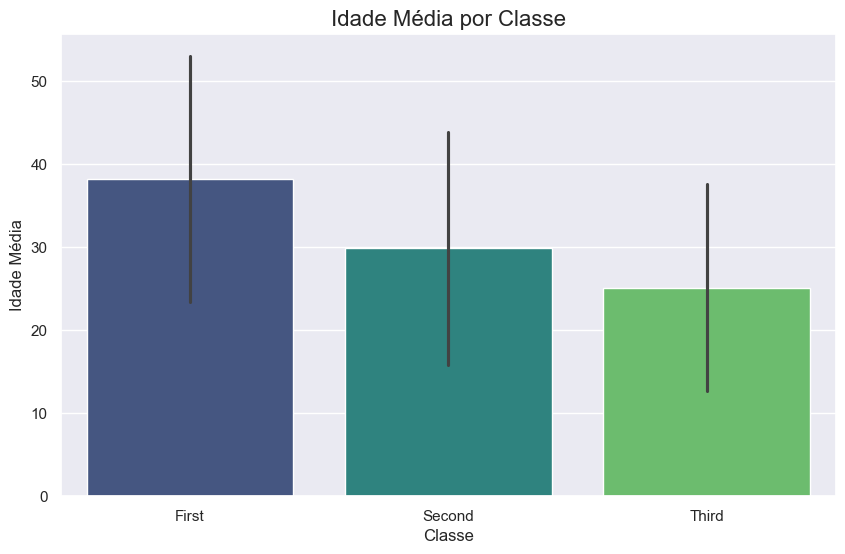

In [21]:
# Média de idade por classe
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='class', y='age', palette='viridis', errorbar='sd')
plt.title('Idade Média por Classe', fontsize=16)
plt.xlabel('Classe')
plt.ylabel('Idade Média')
plt.show()

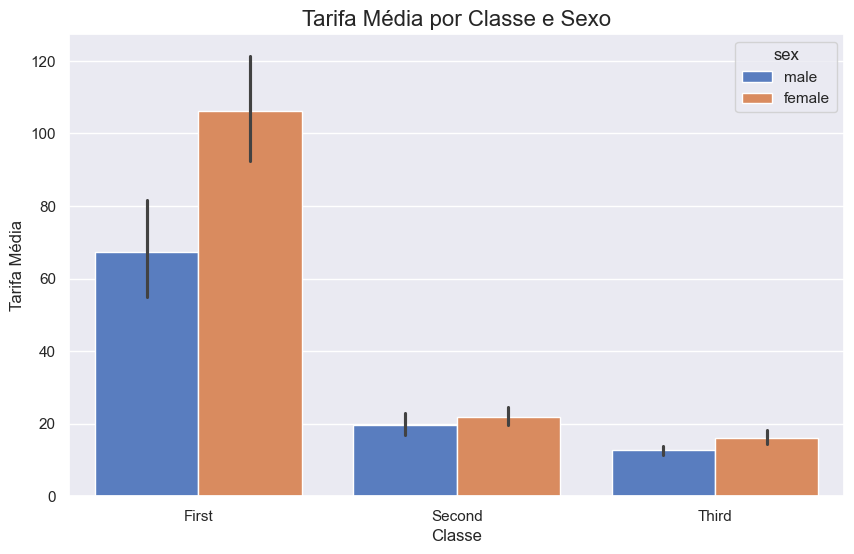

In [22]:
# Tarifa média por classe e sexo
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='class', y='fare', hue='sex', palette='muted')
plt.title('Tarifa Média por Classe e Sexo', fontsize=16)
plt.xlabel('Classe')
plt.ylabel('Tarifa Média')
plt.show()

---
### 📊 Box Plot

**Visualiza distribuição, mediana, quartis e outliers**

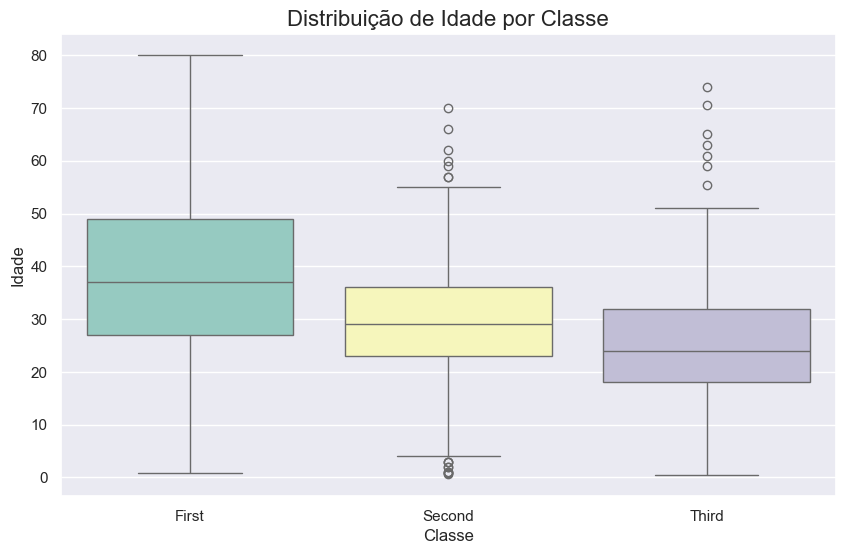

In [23]:
# Box plot de idade por classe
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='class', y='age', palette='Set3')
plt.title('Distribuição de Idade por Classe', fontsize=16)
plt.xlabel('Classe')
plt.ylabel('Idade')
plt.show()

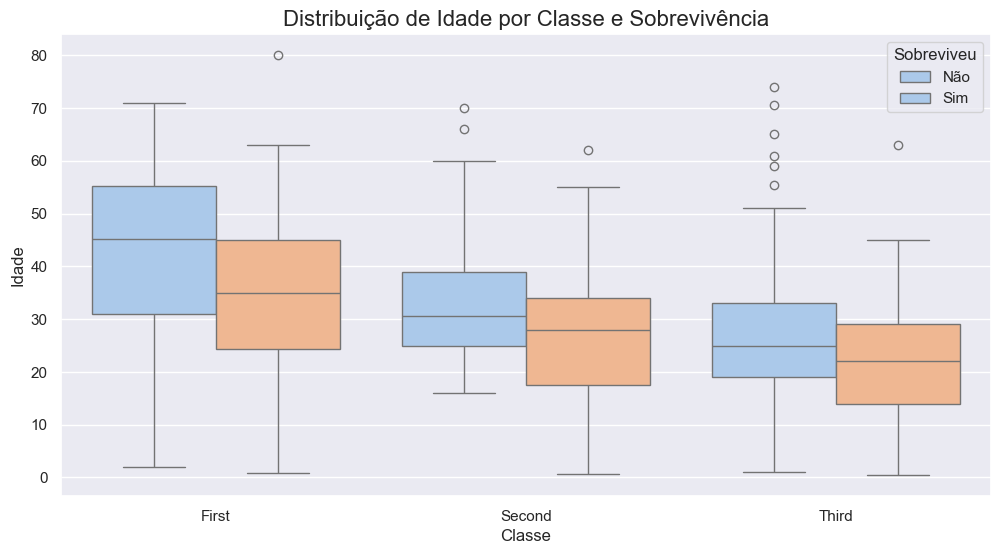

In [24]:
# Box plot com hue
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='class', y='age', hue='survived', palette='pastel')
plt.title('Distribuição de Idade por Classe e Sobrevivência', fontsize=16)
plt.xlabel('Classe')
plt.ylabel('Idade')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

---
### 📊 Violin Plot

**Combina box plot + densidade**

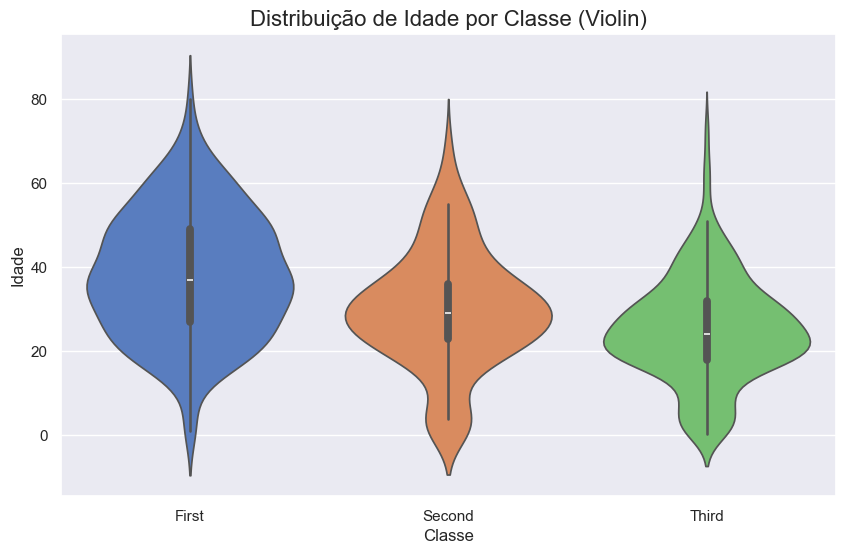

In [25]:
# Violin plot simples
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='class', y='age', palette='muted')
plt.title('Distribuição de Idade por Classe (Violin)', fontsize=16)
plt.xlabel('Classe')
plt.ylabel('Idade')
plt.show()

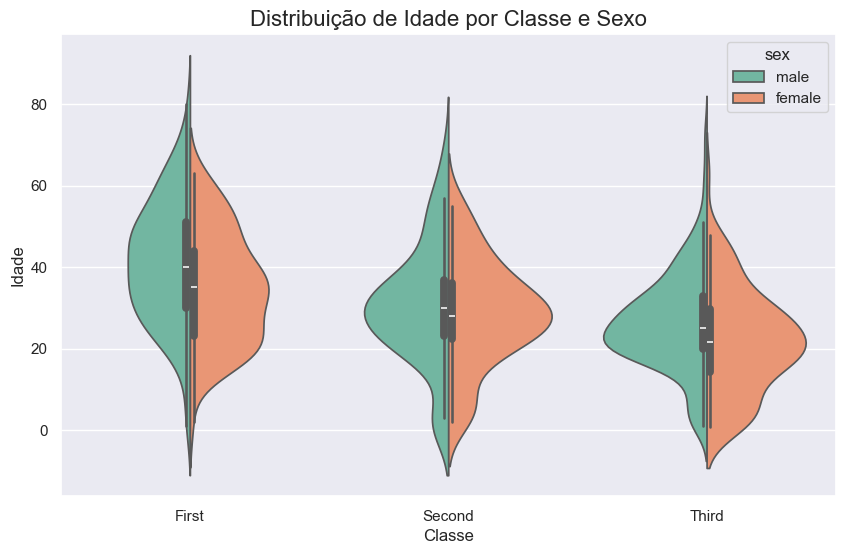

In [26]:
# Violin plot com split (dividido)
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='class', y='age',
               hue='sex', split=True, palette='Set2')
plt.title('Distribuição de Idade por Classe e Sexo', fontsize=16)
plt.xlabel('Classe')
plt.ylabel('Idade')
plt.show()

---
### 📊 Strip Plot e Swarm Plot

**Mostram todos os pontos individuais**


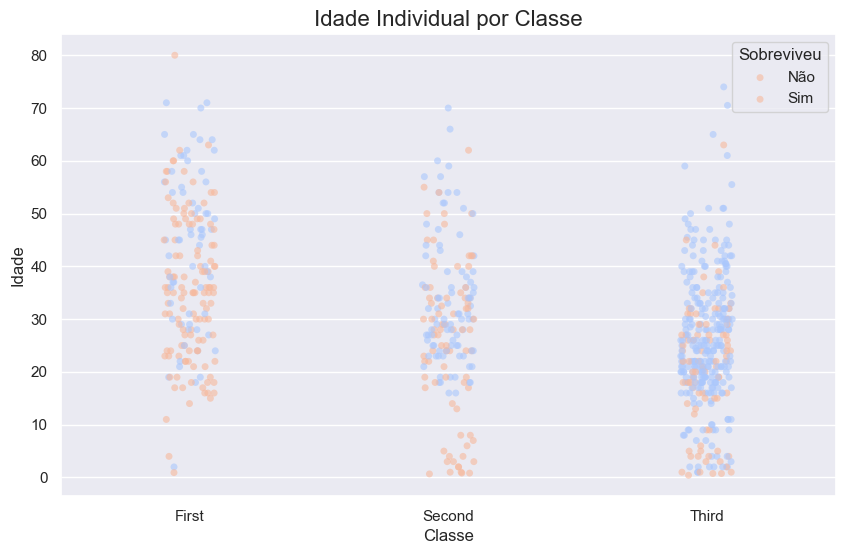

In [27]:
# Strip plot (pontos com jitter)
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='class', y='age', hue='survived',
              palette='coolwarm', alpha=0.6)
plt.title('Idade Individual por Classe', fontsize=16)
plt.xlabel('Classe')
plt.ylabel('Idade')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.show()

---
## #6 - Gráficos de Relação

### 📊 Scatter Plot

**Exemplo 1: Scatter simples**

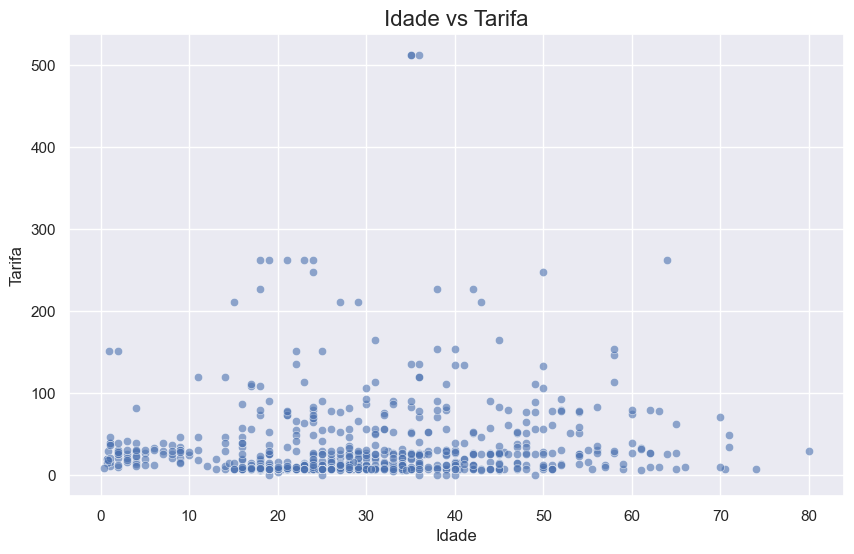

In [29]:
# Scatter plot de idade vs tarifa
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='fare', alpha=0.6)
plt.title('Idade vs Tarifa', fontsize=16)
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.show()

**Exemplo 2: Scatter com cor e tamanho**

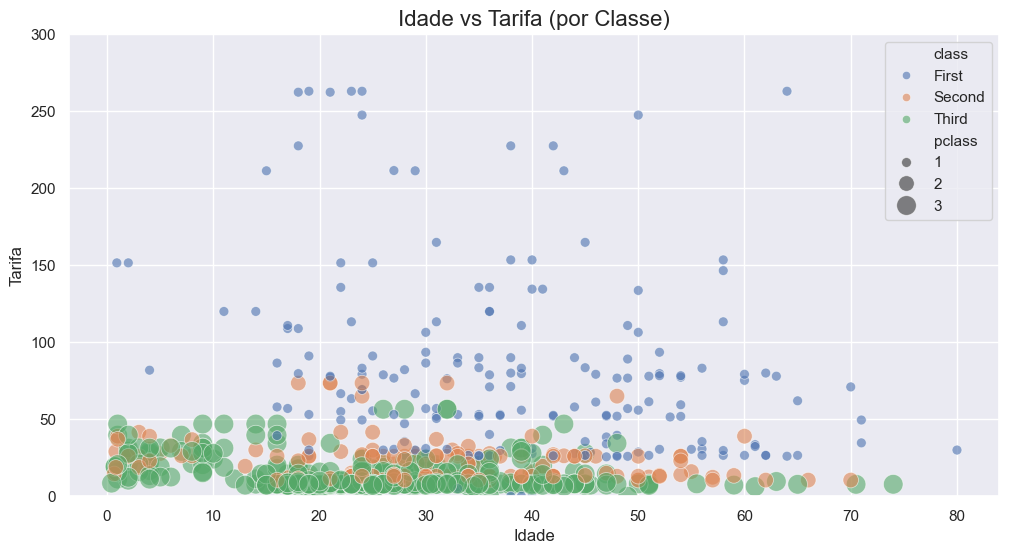

In [30]:
# Scatter com múltiplas dimensões
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='age', y='fare', hue='class', size='pclass',
                sizes=(50, 200), alpha=0.6, palette='deep')
plt.title('Idade vs Tarifa (por Classe)', fontsize=16)
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.ylim(0, 300)
plt.show()

---
### 📊 Line Plot

**Tendências ao longo do tempo ou ordem**

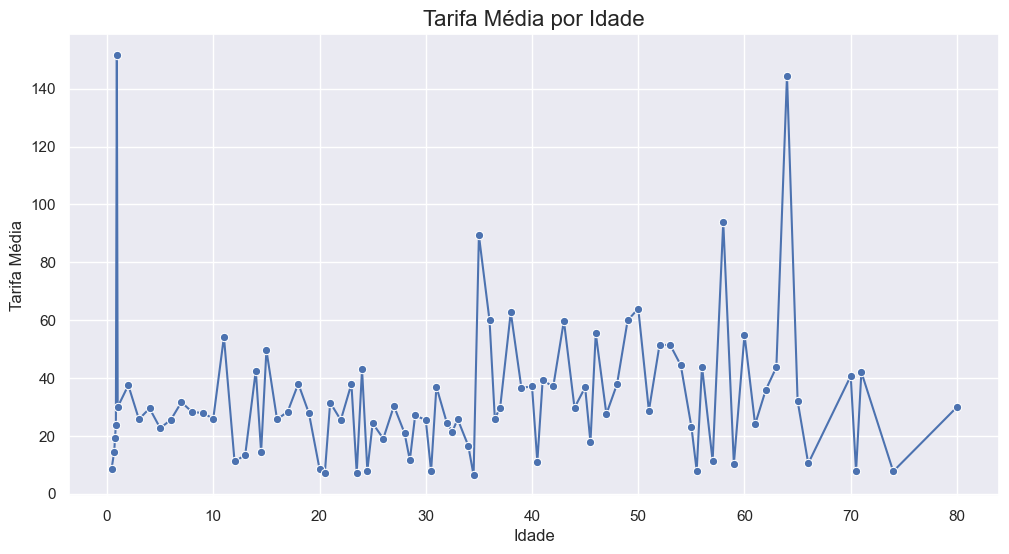

In [31]:
# Preparar dados agregados
age_fare = df.groupby('age')['fare'].mean().reset_index()

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_fare, x='age', y='fare', marker='o')
plt.title('Tarifa Média por Idade', fontsize=16)
plt.xlabel('Idade')
plt.ylabel('Tarifa Média')
plt.show()

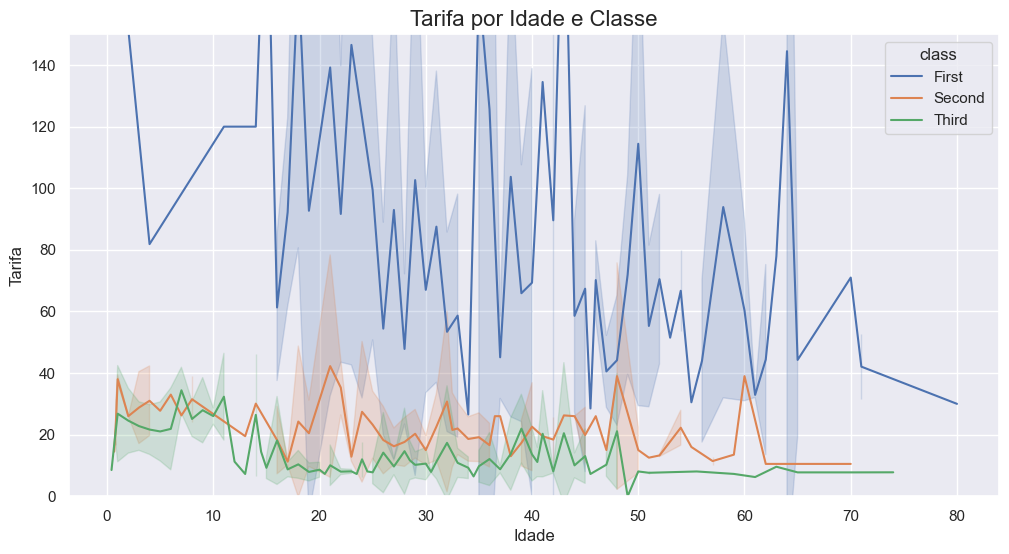

In [32]:
# Line plot com hue
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='age', y='fare', hue='class', errorbar='sd')
plt.title('Tarifa por Idade e Classe', fontsize=16)
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.ylim(0, 150)
plt.show()

---
### 📊 Reg Plot (Regressão Linear)

**Scatter + linha de regressão**

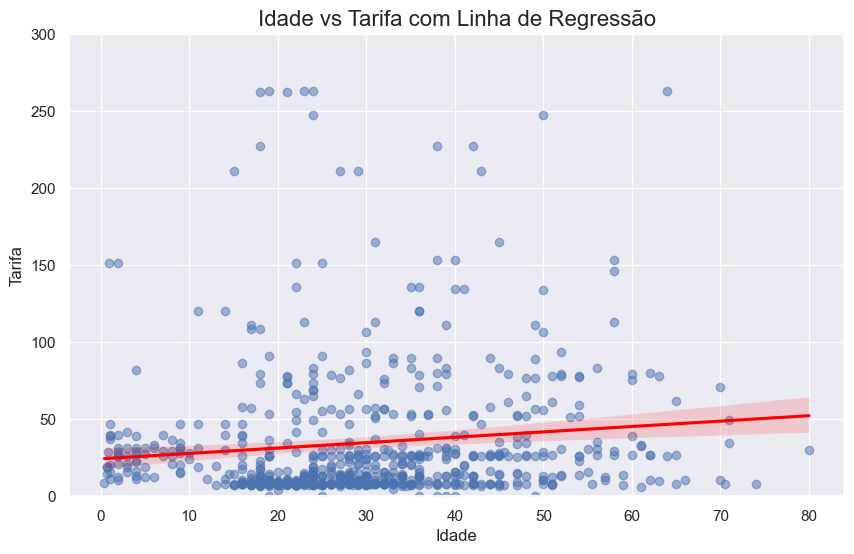

In [33]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='age', y='fare', scatter_kws={
            'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Idade vs Tarifa com Linha de Regressão', fontsize=16)
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.ylim(0, 300)
plt.show()

---
## #7 - Gráficos Matriciais

### 📊 Heatmap (Mapa de Calor)

**Exemplo 1: Matriz de correlação**

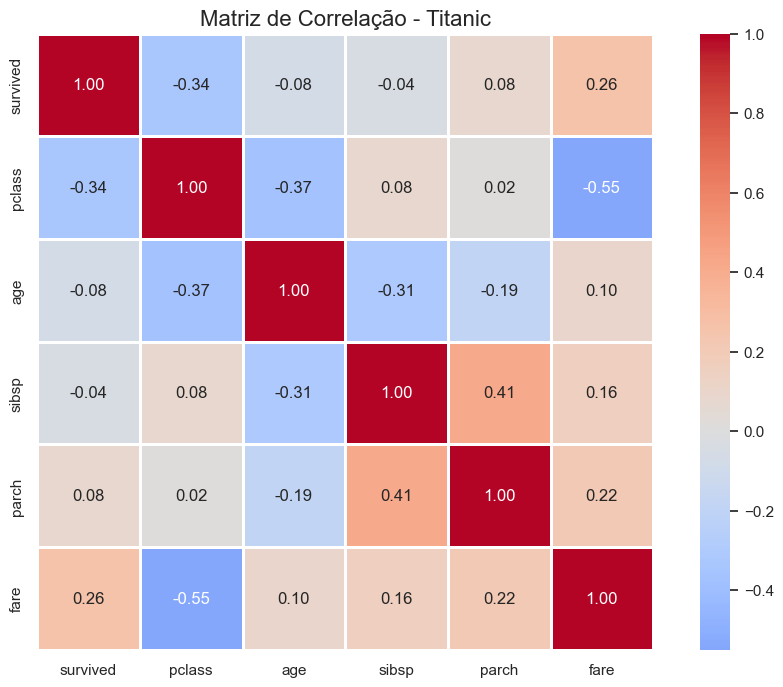

In [34]:
# Selecionar apenas colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Matriz de Correlação - Titanic', fontsize=16)
plt.show()

**Exemplo 2: Heatmap customizado**

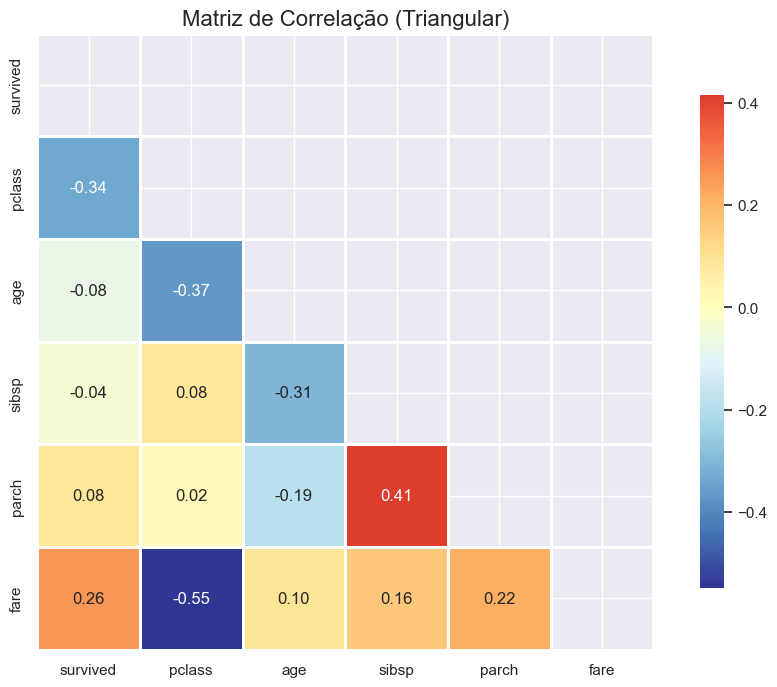

In [35]:
# Heatmap com máscara triangular
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlBu_r',
            mask=mask, center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação (Triangular)', fontsize=16)
plt.show()

---
### 📊 Pair Plot

**Matriz de scatter plots para todas as combinações**

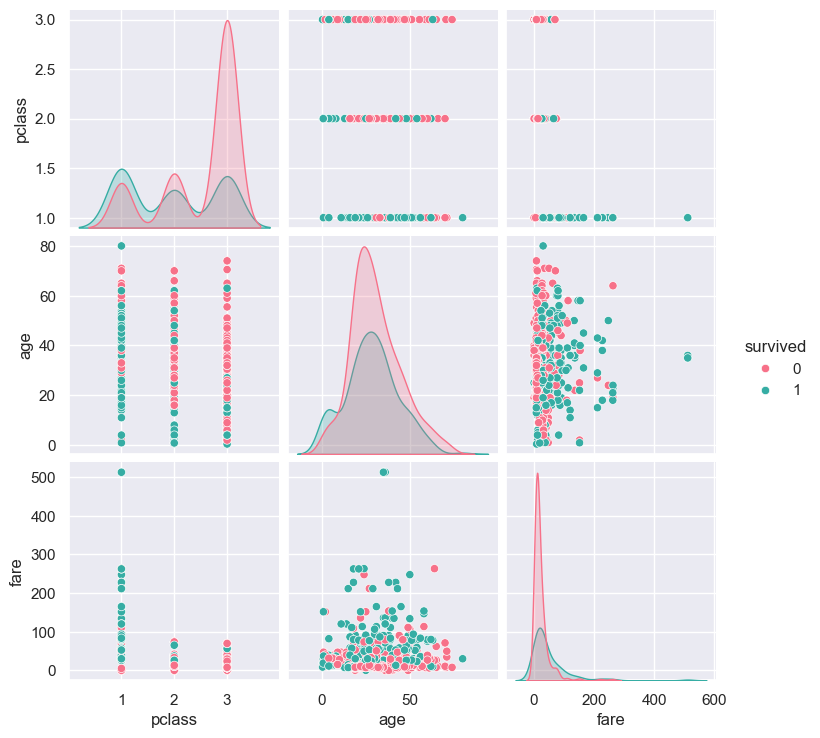

In [37]:
# Pair plot com subset de colunas
sns.pairplot(df[['survived', 'pclass', 'age', 'fare', 'sex']],
             hue='survived', palette='husl', diag_kind='kde', height=2.5)
plt.show()

---
## #8 - Customização e Estilos

### 🎨 Estilos do Seaborn

Estilos disponíveis: `darkgrid`, `whitegrid`, `dark`, `white`, `ticks`

---
### 🎨 Customização Manual

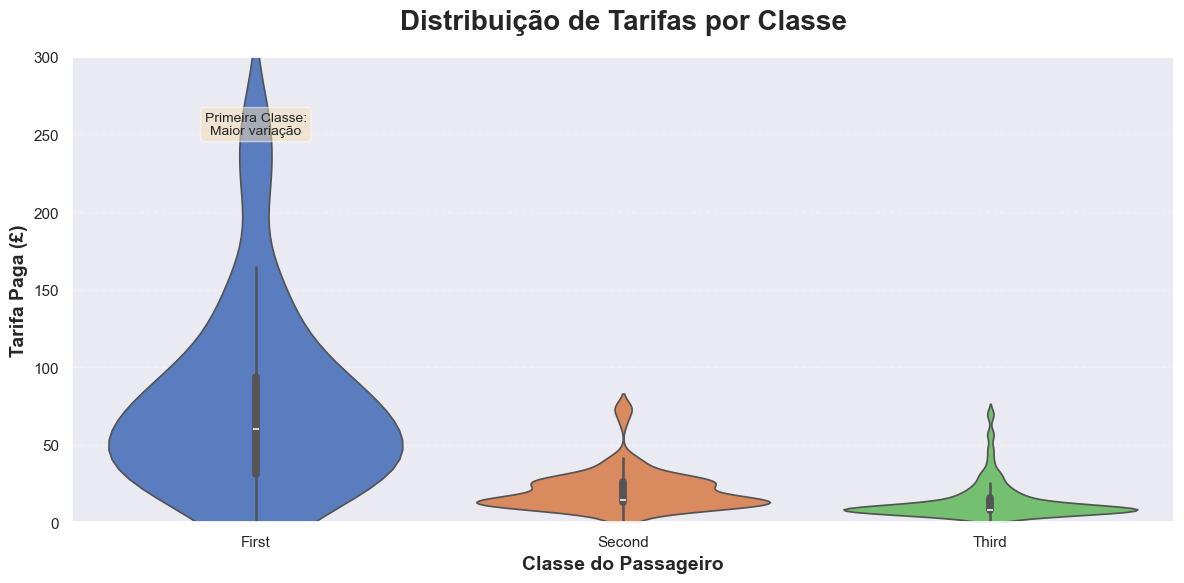

In [39]:
# Gráfico super customizado
plt.figure(figsize=(12, 6))

# Criar o gráfico
ax = sns.violinplot(data=df, x='class', y='fare', palette='muted')

# Customizações
ax.set_title('Distribuição de Tarifas por Classe',
             fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('Classe do Passageiro', fontsize=14, fontweight='bold')
ax.set_ylabel('Tarifa Paga (£)', fontsize=14, fontweight='bold')
ax.set_ylim(0, 300)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Adicionar anotações
ax.text(0, 250, 'Primeira Classe:\nMaior variação',
        ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

---
## #9 - Subplots com Seaborn

### 📊 Usando Figure-level Functions

**FacetGrid**

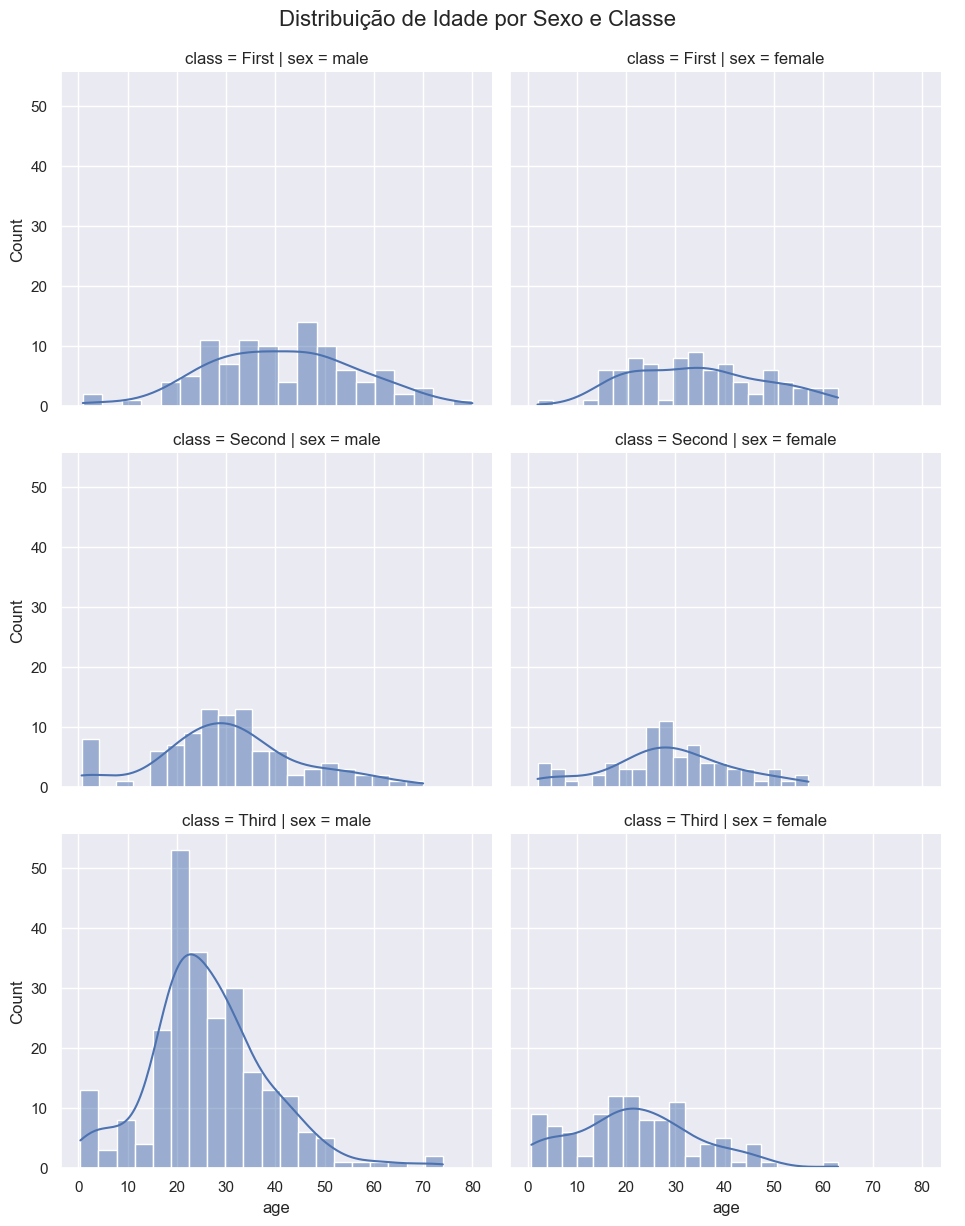

In [40]:
# FacetGrid manual
g = sns.FacetGrid(df, col='sex', row='class', height=4, aspect=1.2)
g.map(sns.histplot, 'age', kde=True, bins=20)
g.add_legend()
g.fig.suptitle('Distribuição de Idade por Sexo e Classe', y=1.02, fontsize=16)
plt.show()

---
### 📊 Usando Matplotlib Subplots

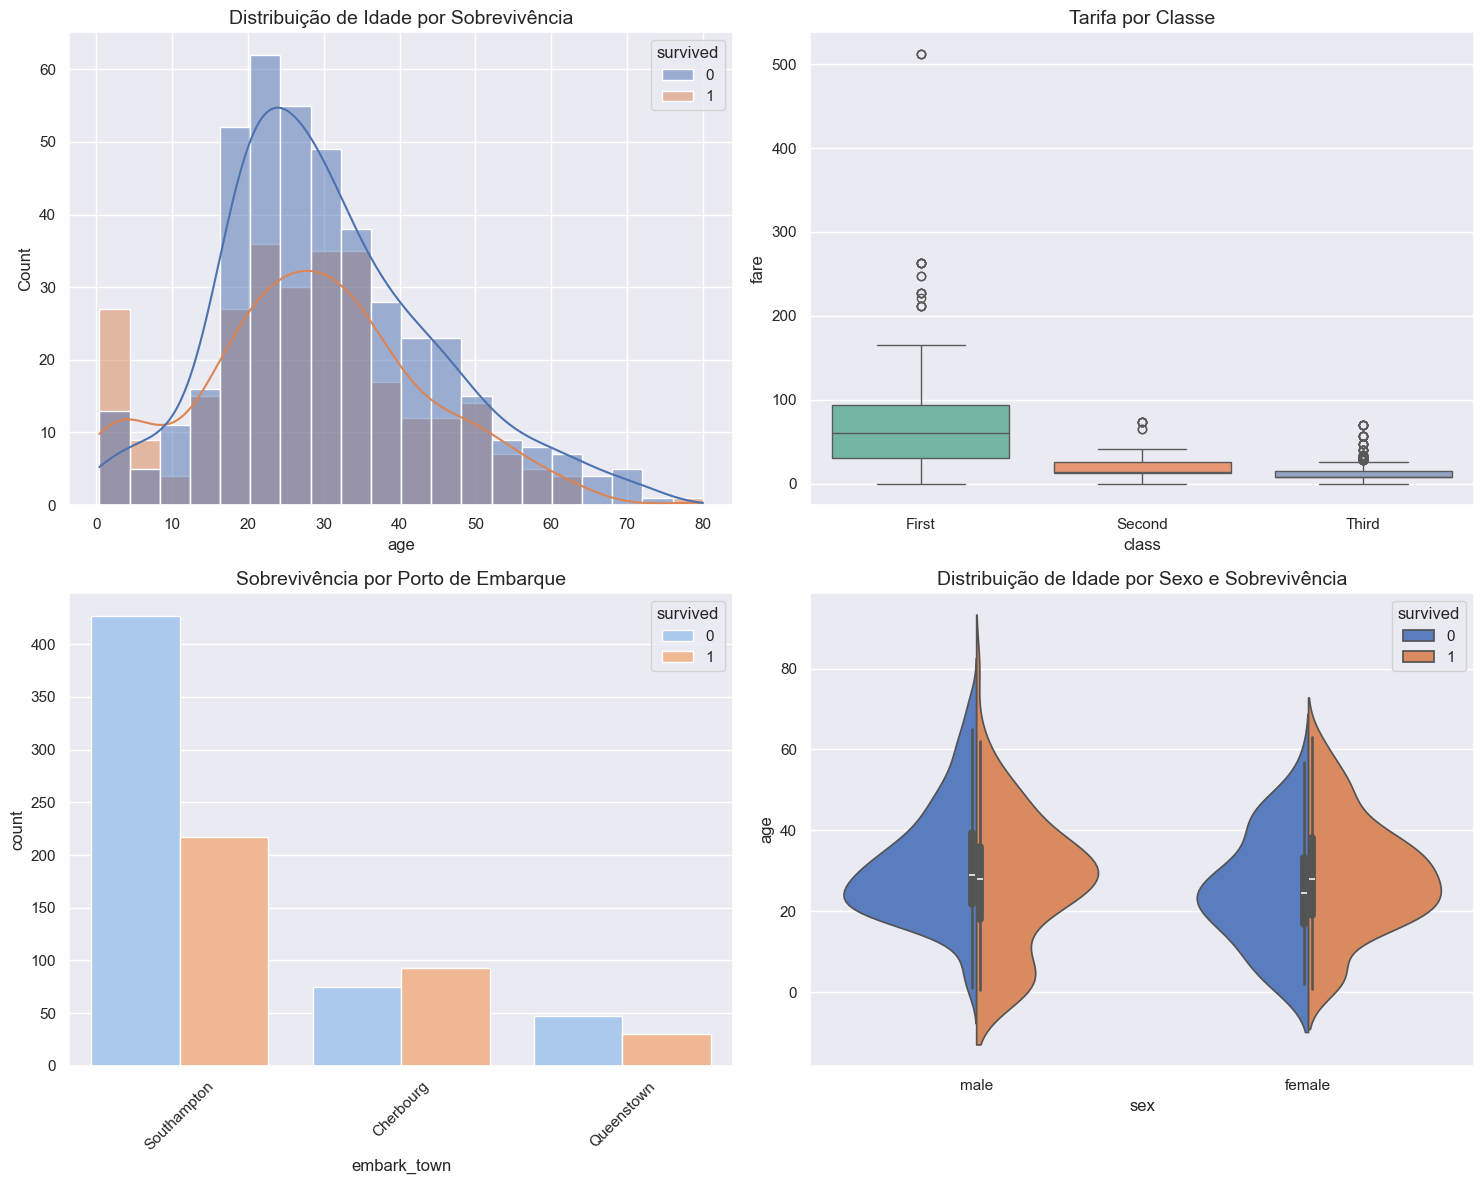

In [41]:
# Múltiplos gráficos usando plt.subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1
sns.histplot(data=df, x='age', hue='survived', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribuição de Idade por Sobrevivência', fontsize=14)

# Gráfico 2
sns.boxplot(data=df, x='class', y='fare', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Tarifa por Classe', fontsize=14)

# Gráfico 3
sns.countplot(data=df, x='embark_town', hue='survived',
              ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Sobrevivência por Porto de Embarque', fontsize=14)
axes[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 4
sns.violinplot(data=df, x='sex', y='age', hue='survived',
               split=True, ax=axes[1, 1], palette='muted')
axes[1, 1].set_title(
    'Distribuição de Idade por Sexo e Sobrevivência', fontsize=14)

plt.tight_layout()
plt.show()

---
### 🎨 Criando Paleta Customizada

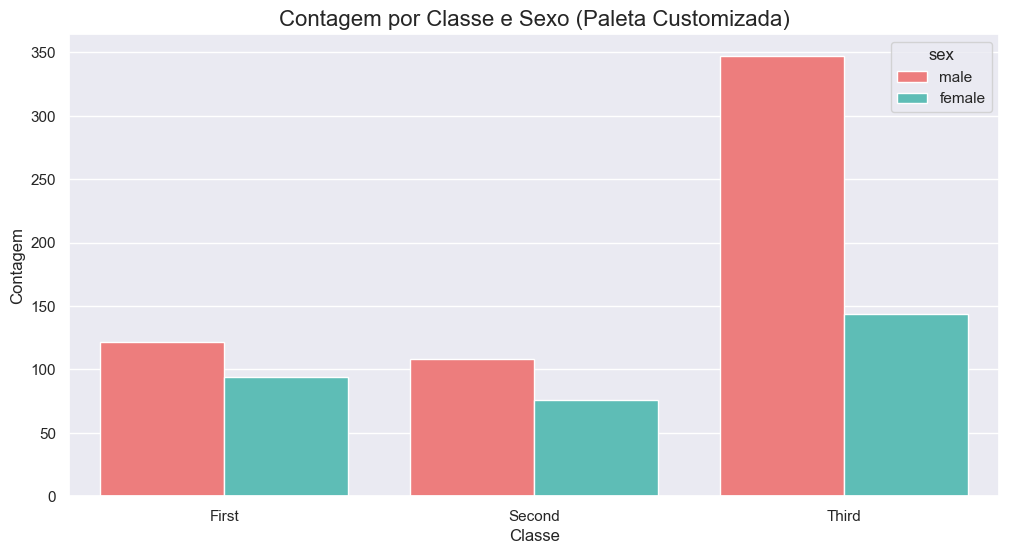

In [42]:
# Criar paleta customizada
custom_palette = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='class', hue='sex', palette=custom_palette)
plt.title('Contagem por Classe e Sexo (Paleta Customizada)', fontsize=16)
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

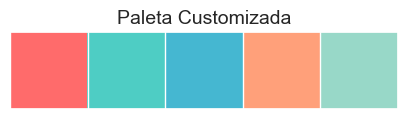

In [43]:
# Visualizar paleta
sns.palplot(sns.color_palette(custom_palette))
plt.title('Paleta Customizada', fontsize=14)
plt.show()

---
## #11 - Perguntas Comuns

### Como salvar um gráfico?

✅ Gráficos salvos!


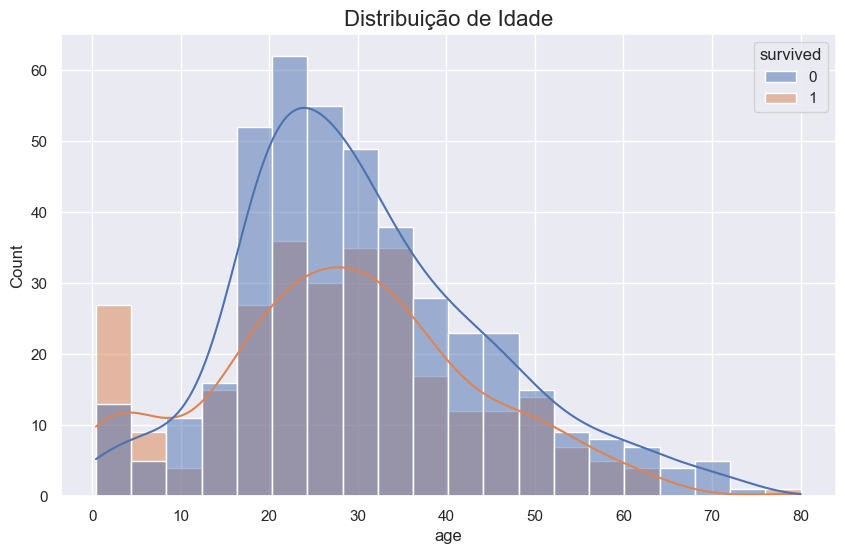

In [44]:
# Criar um gráfico
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='survived', kde=True)
plt.title('Distribuição de Idade', fontsize=16)

# Salvar em diferentes formatos
plt.savefig('grafico_seaborn.png', dpi=300, bbox_inches='tight')
plt.savefig('grafico_seaborn.pdf', bbox_inches='tight')
plt.savefig('grafico_seaborn.svg', bbox_inches='tight')

print("✅ Gráficos salvos!")
plt.show()

---
### Como remover spines (bordas)?

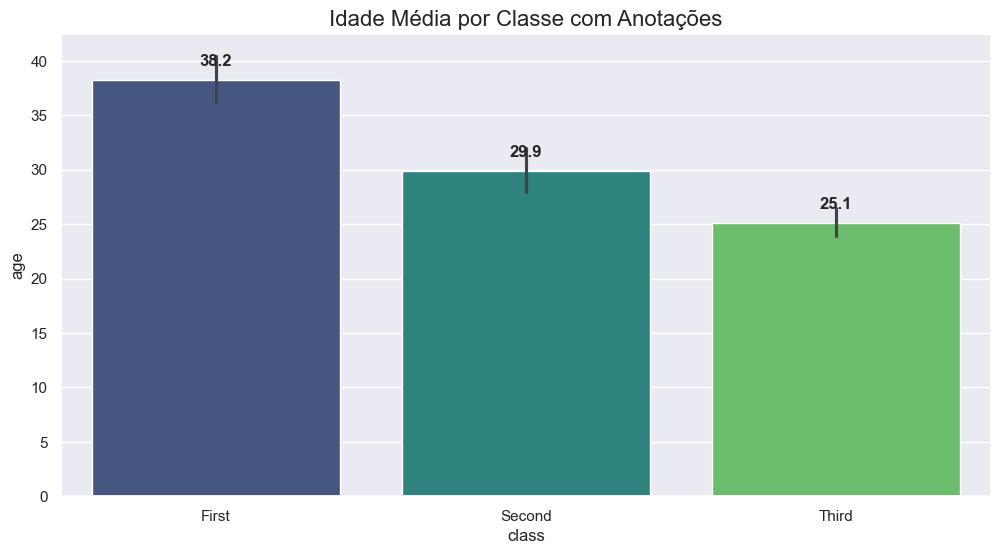

In [45]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x='class', y='age', palette='viridis')
plt.title('Idade Média por Classe com Anotações', fontsize=16)

# Adicionar anotações
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

---
### Como criar gráfico com duas escalas Y?

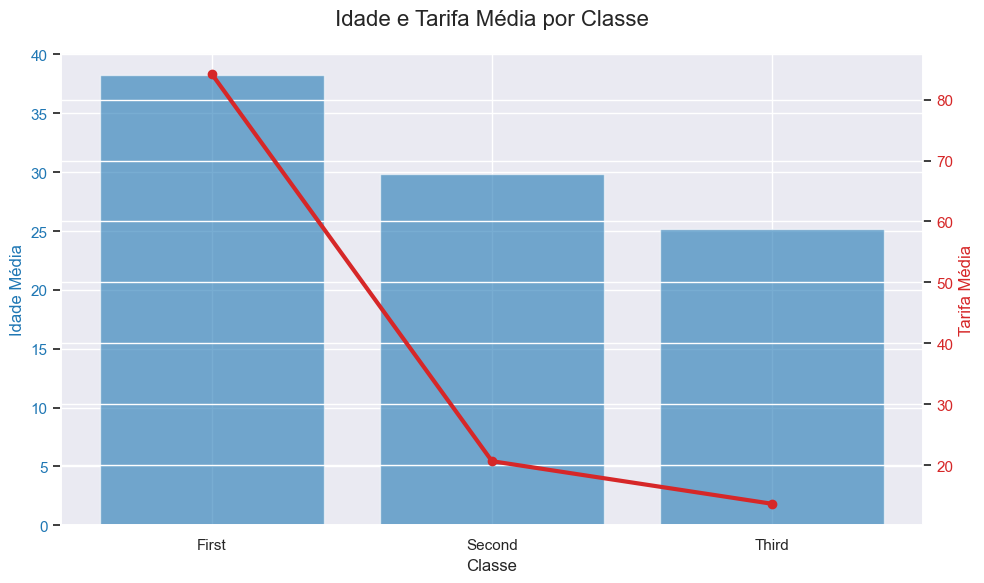

In [47]:
# Preparar dados
age_stats = df.groupby('class').agg(
    {'age': 'mean', 'fare': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Primeiro eixo Y
color = 'tab:blue'
ax1.set_xlabel('Classe', fontsize=12)
ax1.set_ylabel('Idade Média', color=color, fontsize=12)
ax1.bar(age_stats['class'], age_stats['age'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

# Segundo eixo Y
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Tarifa Média', color=color, fontsize=12)
ax2.plot(age_stats['class'], age_stats['fare'],
         color=color, marker='o', linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Idade e Tarifa Média por Classe', fontsize=16, pad=20)
fig.tight_layout()
plt.show()

---
### Como adicionar linha de referência?

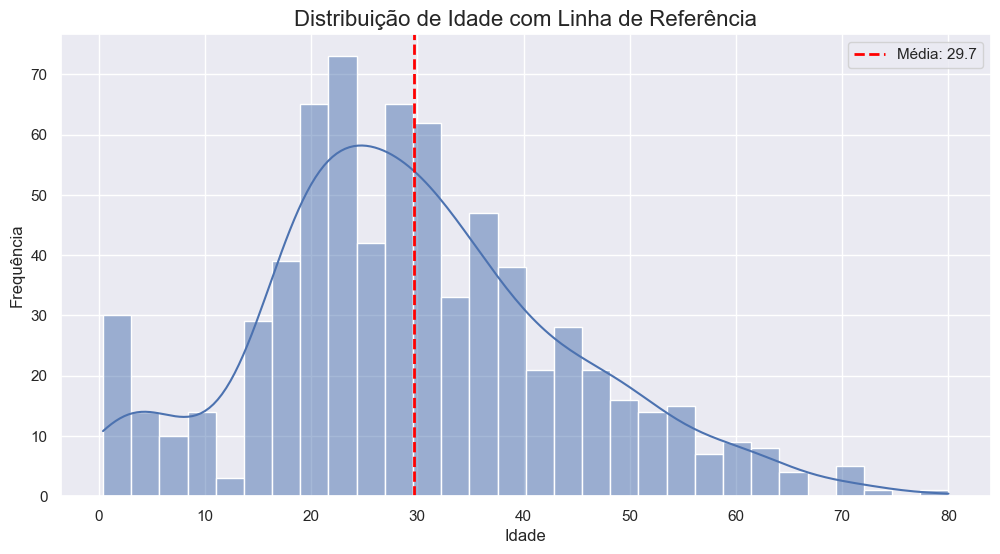

In [49]:
# Calcular média
mean_age = df['age'].mean()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', kde=True, bins=30)
plt.axvline(mean_age, color='red', linestyle='--',
            linewidth=2, label=f'Média: {mean_age:.1f}')
plt.title('Distribuição de Idade com Linha de Referência', fontsize=16)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend()
plt.show()

---
##  Resumo Final

### Principais Tipos de Gráficos do Seaborn

| Tipo | Função | Melhor Para |
|------|--------|-------------|
| **Distribuição** | `histplot`, `kdeplot`, `displot` | Ver distribuição de variáveis |
| **Categórico** | `countplot`, `barplot`, `boxplot`, `violinplot` | Comparar categorias |
| **Relação** | `scatterplot`, `lineplot`, `regplot` | Ver relações entre variáveis |
| **Matricial** | `heatmap`, `clustermap`, `pairplot` | Ver múltiplas relações |

### Quando usar cada gráfico?

**Para ver distribuição de UMA variável:**
- `histplot` → Distribuição básica
- `kdeplot` → Distribuição suave
- `boxplot` → Quartis e outliers
- `violinplot` → Distribuição + densidade

**Para comparar CATEGORIAS:**
- `countplot` → Contagem simples
- `barplot` → Médias com erro
- `boxplot` → Distribuição por categoria
- `stripplot` / `swarmplot` → Pontos individuais

**Para ver RELAÇÃO entre duas variáveis:**
- `scatterplot` → Correlação geral
- `lineplot` → Tendências
- `regplot` → Com regressão linear

**Para análise MULTIVARIADA:**
- `pairplot` → Todas as combinações
- `heatmap` → Correlações
- `FacetGrid` → Múltiplas visualizações

### 💡 Dicas Importantes:

1. **Sempre inicie com**:
```python
sns.set_theme()
%matplotlib inline
```

2. **Para gráficos mais bonitos**:
```python
sns.set_style('whitegrid')
sns.set_context('talk')
```

3. **Para salvar com qualidade**:
```python
plt.savefig('nome.png', dpi=300, bbox_inches='tight')
```

4. **Para múltiplos gráficos**:
```python
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
```

---
## BÔNUS: Exemplos Práticos de Análise

### Análise Completa de Sobrevivência no Titanic

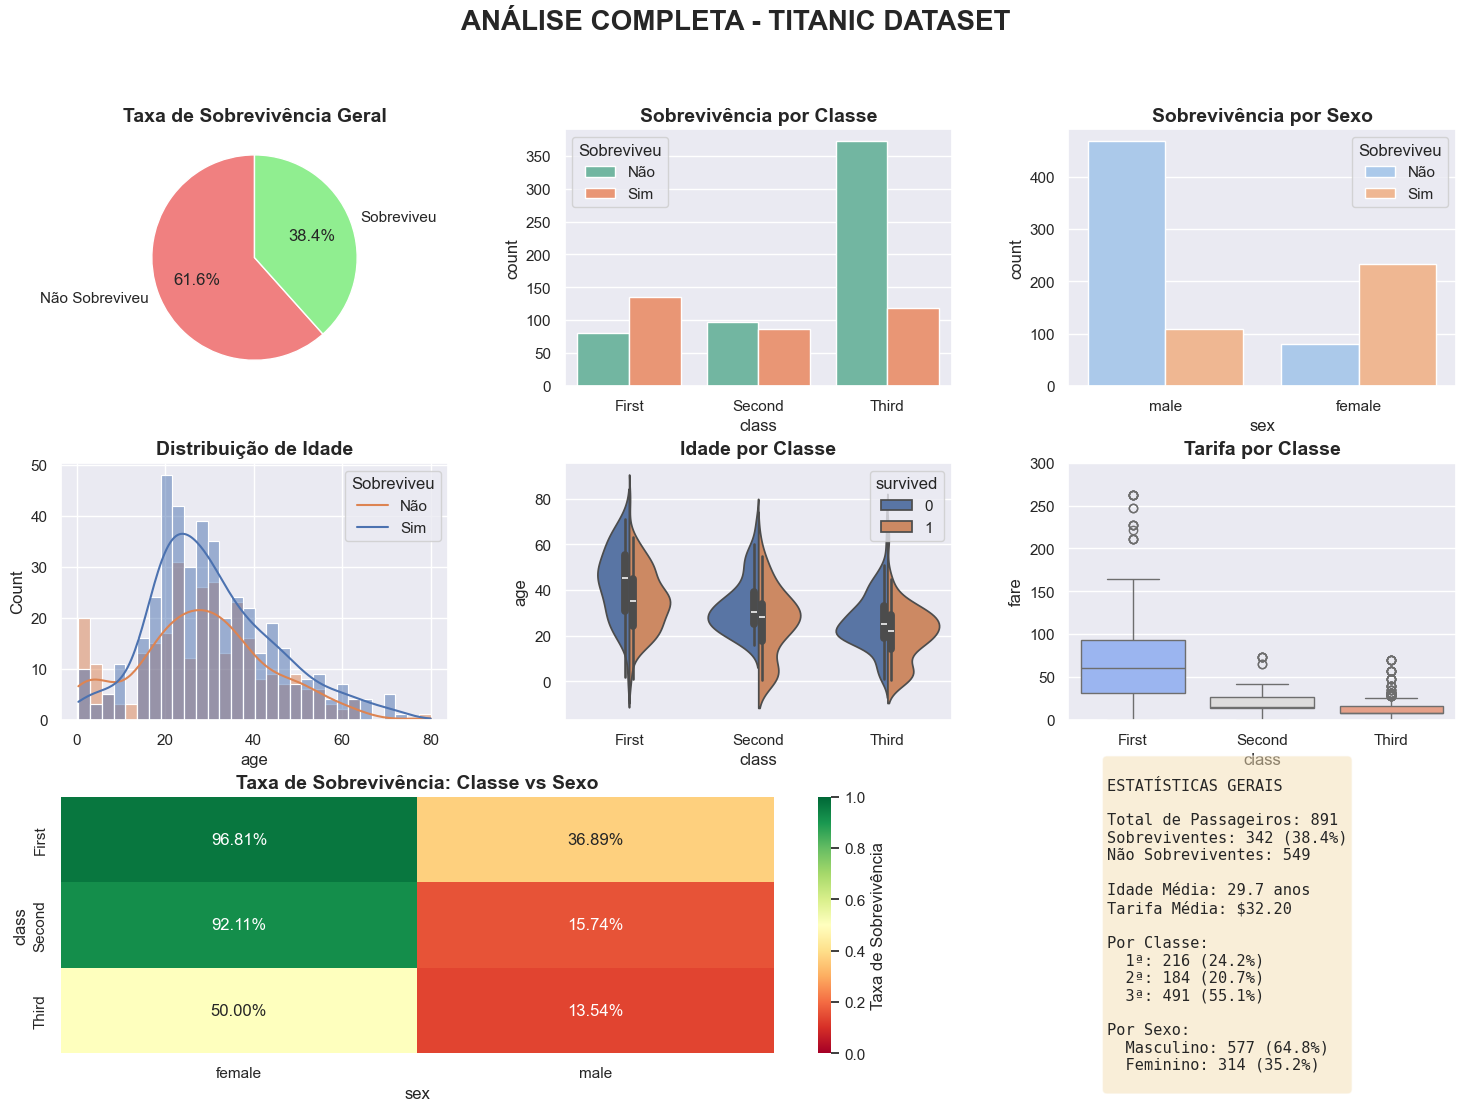

In [50]:
# Dashboard completo de análise
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Taxa de sobrevivência geral
ax1 = fig.add_subplot(gs[0, 0])
survival_rate = df['survived'].value_counts()
ax1.pie(survival_rate, labels=['Não Sobreviveu', 'Sobreviveu'],
        autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], startangle=90)
ax1.set_title('Taxa de Sobrevivência Geral', fontsize=14, fontweight='bold')

# 2. Sobrevivência por classe
ax2 = fig.add_subplot(gs[0, 1])
sns.countplot(data=df, x='class', hue='survived', ax=ax2, palette='Set2')
ax2.set_title('Sobrevivência por Classe', fontsize=14, fontweight='bold')
ax2.legend(title='Sobreviveu', labels=['Não', 'Sim'])

# 3. Sobrevivência por sexo
ax3 = fig.add_subplot(gs[0, 2])
sns.countplot(data=df, x='sex', hue='survived', ax=ax3, palette='pastel')
ax3.set_title('Sobrevivência por Sexo', fontsize=14, fontweight='bold')
ax3.legend(title='Sobreviveu', labels=['Não', 'Sim'])

# 4. Distribuição de idade
ax4 = fig.add_subplot(gs[1, 0])
sns.histplot(data=df, x='age', hue='survived', kde=True, ax=ax4, bins=30)
ax4.set_title('Distribuição de Idade', fontsize=14, fontweight='bold')
ax4.legend(title='Sobreviveu', labels=['Não', 'Sim'])

# 5. Idade por classe
ax5 = fig.add_subplot(gs[1, 1])
sns.violinplot(data=df, x='class', y='age', hue='survived', split=True, ax=ax5)
ax5.set_title('Idade por Classe', fontsize=14, fontweight='bold')

# 6. Tarifa por classe
ax6 = fig.add_subplot(gs[1, 2])
sns.boxplot(data=df, x='class', y='fare', ax=ax6, palette='coolwarm')
ax6.set_title('Tarifa por Classe', fontsize=14, fontweight='bold')
ax6.set_ylim(0, 300)

# 7. Heatmap de sobrevivência
ax7 = fig.add_subplot(gs[2, :2])
survival_pivot = df.pivot_table(
    values='survived', index='class', columns='sex', aggfunc='mean')
sns.heatmap(survival_pivot, annot=True, fmt='.2%', cmap='RdYlGn', ax=ax7,
            cbar_kws={'label': 'Taxa de Sobrevivência'}, vmin=0, vmax=1)
ax7.set_title('Taxa de Sobrevivência: Classe vs Sexo',
              fontsize=14, fontweight='bold')

# 8. Estatísticas textuais
ax8 = fig.add_subplot(gs[2, 2])
ax8.axis('off')
stats_text = f"""
ESTATÍSTICAS GERAIS

Total de Passageiros: {len(df)}
Sobreviventes: {df['survived'].sum()} ({df['survived'].mean()*100:.1f}%)
Não Sobreviventes: {len(df) - df['survived'].sum()}

Idade Média: {df['age'].mean():.1f} anos
Tarifa Média: ${df['fare'].mean():.2f}

Por Classe:
  1ª: {len(df[df['pclass'] == 1])} ({len(df[df['pclass'] == 1])/len(df)*100:.1f}%)
  2ª: {len(df[df['pclass'] == 2])} ({len(df[df['pclass'] == 2])/len(df)*100:.1f}%)
  3ª: {len(df[df['pclass'] == 3])} ({len(df[df['pclass'] == 3])/len(df)*100:.1f}%)

Por Sexo:
  Masculino: {len(df[df['sex'] == 'male'])} ({len(df[df['sex'] == 'male'])/len(df)*100:.1f}%)
  Feminino: {len(df[df['sex'] == 'female'])} ({len(df[df['sex'] == 'female'])/len(df)*100:.1f}%)
"""
ax8.text(0.1, 0.5, stats_text, fontsize=11, verticalalignment='center',
         fontfamily='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

fig.suptitle('ANÁLISE COMPLETA - TITANIC DATASET',
             fontsize=20, fontweight='bold', y=0.98)
plt.show()

---
## Desafios para Praticar

Tente criar estas visualizações por conta própria:

### Desafio 1: Exploração Básica
Usando o dataset `tips`:
```python
tips = sns.load_dataset('tips')
```
1. Criar histograma da gorjeta
2. Box plot da conta total por dia da semana
3. Scatter plot de conta vs gorjeta colorido por fumante

### Desafio 2: Análise Intermediária
Usando o dataset `diamonds`:
```python
diamonds = sns.load_dataset('diamonds')
```
1. Heatmap de correlação
2. Violin plot de preço por qualidade do corte
3. Pair plot das variáveis numéricas

### Desafio 3: Dashboard Avançado
Criar um dashboard 2x3 com o Titanic mostrando:
1. Distribuição de idade por sexo
2. Taxa de sobrevivência por porto de embarque
3. Relação entre tarifa e idade
4. Contagem de passageiros por classe
5. Heatmap de correlação
6. Estatísticas em texto

### Desafio 4: Estilo Personalizado
1. Criar um tema customizado
2. Criar uma paleta de cores própria
3. Fazer um gráfico com esse estilo


---
## 📝 Comparação: Matplotlib vs Seaborn vs Plotly

| Característica | Matplotlib | Seaborn | Plotly |
|----------------|------------|---------|--------|
| **Curva de Aprendizado** | Média | Fácil | Fácil |
| **Qualidade Visual** | ⭐⭐⭐ | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐⭐ |
| **Interatividade** | ❌ | ❌ | ✅ |
| **Estatísticas** | Manual | ✅ Embutido | Manual |
| **Customização** | ⭐⭐⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐⭐ |
| **Performance** | ⭐⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐ |
| **Código Necessário** | Muito | Pouco | Médio |

### Quando usar cada um?

**Matplotlib:**
- Base para tudo
- Quando precisa de controle total
- Publicações científicas

**Seaborn:**
- Análise exploratória
- Visualizações estatísticas
- Gráficos bonitos rapidamente

**Plotly:**
- Dashboards interativos
- Apresentações web
- Quando precisa de interatividade

---